# **Proyecto 3 -  Una exploración profunda a la base de nivel de obsesidad**
---

El problema a abordar en este proyecto se centra en la estimación de los niveles de obesidad basados en los hábitos alimenticios y la condición física. Utilizaremos la base de datos Obesity Data disponible en la UCI Machine Learning Repository. Este conjunto de datos contiene información detallada sobre diversos factores que pueden influir en los niveles de obesidad de una persona, como los hábitos alimenticios, la actividad física, y características demográficas. La variable objetivo en este análisis será la clase de obesidad, la cual clasifica a los individuos en diferentes categorías de obesidad.

### Equipo de trabajo

- Marcela Vásquez
- Omar Avendaño
- Duván Robayo


En la siguiente celda se importan las librerías necesarias para el análisis de datos y la construcción de modelos de aprendizaje automático: **pandas, numpy, matplotlib, seaborn, sci-kit learn, prince y imblearn**.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from prince import MCA
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## **0.  Leer el archivo de datos**
---

Vamos a utilizar el dataset besityData.csv que se encuentra en un repositorio en línea y lo cargaremos en el dataframe data.

In [2]:
# CARGAMOS DESDE EL DATASET LOCAL
df = pd.read_csv("ObesityData.csv")

In [3]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres primeras filas usando .head().

df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [4]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres últimas filas, usando tail(), esto con el fin de revisar previamente la variabilidad de los datos

df.tail(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## **1. Tipos de variables**
---
En esta sección haremos una revisión de las variables existentes en el dataframe y una descripción detallada de cada una de las columnas.

In [5]:
# REVISIÓN DE LA FORMA DEL DATAFRAME (CANTIDAD DE FILAS Y CANTIDAD DE COLUMNAS)
# Vamos a revisar el número de filas y columnas del dataframe, para saber con qué cantidad de información contamos.
# Usamos el método .shape

print(f"El número de filas del dataset es de: {df.shape[0]}")
print(f"El número de columnas del dataset es de: {df.shape[1]}")

El número de filas del dataset es de: 2111
El número de columnas del dataset es de: 17


### **1.1.  Tipos de datos de las columnas y registros nulos**

Se identifica las columnas, se hace una revisión de la cantidad de datos no nulos y el tipo de dato por cada columna.

In [6]:
# REVISIÓN GENERAL DEL DATAFRAME
# Este metodo permite mostrar información sobre las columnas y sus tipos de datos, así como un conteo de los valores no nulos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Determinamos la cantidad de variables y registros. Y el tipo de variables si son numericas o cualitativas

In [7]:
num_variables = len(df.columns)
num_registros = len(df)

numericas = df.select_dtypes(include='number').columns.tolist()
cualitativas = df.select_dtypes(exclude='number').columns.tolist()

print("Cantidad de variables:", num_variables)
print("Cantidad de registros:", num_registros)
print("Variables numéricas:", numericas)
print("Variables cualitativas:", cualitativas)

Cantidad de variables: 17
Cantidad de registros: 2111
Variables numéricas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Variables cualitativas: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


**Notas:**
- Se evidencian dos tipos de datos (Object y float)
- Se observa todas las variables están completas al no tener registros nulos, de los 2111 registros, todas las variables cuentan con datos válidos.
- Preliminarmente se puede observar que existen 8 variables numéricas y 9 cualitativas.

### **1.2.  Revisión estadística de las variables numéricas**

Se identifica por cada variable numérica el promedio, la desviación promedio de los datos, los valores mínimos y máximos, así como los percentiles..

In [8]:
# DESCRIPCIÓN ESTADÍSTICA DE LOS DATOS
# El método describe nos permite traer varias medidas como: valores únicos, el valor más frecuente.

df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Notas:**
- Podemos observar que en promedio la edad es de 24 años entre los registros que tiene la base de datos y con una desviación del promedio de 6 años entre los registros. Adicionalmente la edad máxima es de 61 años y la mínima de 14 años. También podemos observar que el 75% de las personas que se encuentran en este registro se encuentran por debajo de los 26 años.
- Con respecto a la altura, el promedio es de 1.70 metros, con minimas variaciones en promedio de solo 9 cm, una altura máxima de 1.98 metros y una mínima de 1.45 metros.
- Con respecto a los pesos, una variable muy importante, podemos observar un promedio de 86 kg, aunque con mayores variaciones en promedio. Podemos observar que peso máximo registrado es de 173 kilogramos y el peso mínimo de 39 kg.

### **1.3 Revision Estadistica de las variables categoricas**

Generamos un resumen de las variables categoricas. Se identifica por cada categorica el numero de valores nulos, el numero de valores unicos, el valor mas frecuente (moda) en cada columna y la frecuencia del valor mas frecuente.

In [9]:
# Resumen de las variables cualitativas
print(df.describe(include=['object']))

       Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  


El resumen muestra que hay 2111 registros en el conjunto de datos. La mayoría de los participantes son hombres (1068) y tienen antecedentes familiares de sobrepeso (1726). La mayoría también indica consumir alimentos hipercalóricos (1866) y utilizar el transporte público (1580). La mayoría no fuma (2067) ni consume alcohol (2015). El tipo de obesidad más común es el tipo I (351).

### **1.4.  Diccionario de datos**

Se describen cada una de las columnas presentes en este dataframe, proponiendo un nuevo nombre, la definición de estas variables, los valores ejemplo que toman los campos de estas columnas, los tipos de datos y tipos de variable.

El conjunto de datos de df cuenta con las siguientes variables:

| Variable                       | Nuevo Nombre      | Definición	                            | Tipo de Dato (Python) | Tipo de Variable    |
|:------------------------------:|:-----------------:|:-----------------------------------------|:---------------------:|:-------------------:|
| Gender                         | Genero            | Clasificación por genero.                | String                | Categórica(nominal) |
| Age                            | Edad              | Cantidad de años                         | Integer               | Numérica(discreta)  |
| Height                         | Altura            | Altura total de la persona               | Float                 | Numérica(continua)  |
| Weight                         | Peso              | Peso total de la persona                 | Float                 | Numérica(continua)  |
| family_history_with_overweight | HistorialObesidad | Historial o no de obesidad en la familia | String                | Categórica(nominal) |
| FAVC                           | CaloriasAltas     | Consumo o no alimentos altos en calorias | String                | Categórica(nominal) |
| FCVC                           | ConsumoVegetales  | Frecuencia consumo vegetales en comidas  | Float                 | Numérica(continua)  |
| NCP                            | NumeroComidas     | Numero de comidas principales            | Float                 | Numérica(continua)  |
| CAEC                           | EntreComidas      | Clasificación frecuencia entre comidas   | String                | Categórica(nominal) |
| SMOKE                          | Fumador           | Consumo o no de cigarillo                | String                | Categórica(nominal) |
| CH20                           | ConsumoAgua       | Cantidad de agua consumida diariamente   | Float                 | Numérica(continua)  |
| SCC                            | MonitoreoCalorias | Monitoreo o no de las calorias diarias   | String                | Categórica(nominal) |
| FAF                            | ActividadFisica   | Tiempo de actividad física               | Float                 | Numérica(continua)  |
| TUE                            | ActividadDigital  | Tiempo de uso dispositivos digitales     | Float                 | Numérica(continua)  |
| CALC                           | ConsumoAlcohol    | Clasificación frecuencia alcohol         | String                | Categórica(nominal) |
| MTRANS                         | MedioTransporte   | Tipo de transporte que la persona usa    | String                | Categórica(nominal) |
| NObeyesdad                     | NivelObesidad     | Clasificación de obesidad de la persona  | String                | Categórica(nominal) |

### **1.5.  Cambios en columnas**

A continuación se realizan algunos ajustes al dataset con el fin de facilitar las operaciones.

In [10]:
# Creamos un diccionario de mapeo para cambiar los nombres de las columnas
nombres = {
    'Gender': 'Genero',
    'Age': 'Edad',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'HistorialObesidad',
    'FAVC': 'CaloriasAltas',
    'FCVC': 'ConsumoVegetales',
    'NCP': 'NumeroComidas',
    'CAEC': 'EntreComidas',
    'SMOKE': 'Fumador',
    'CH2O': 'ConsumoAgua',
    'SCC': 'MonitoreoCalorias',
    'FAF': 'ActividadFisica',
    'TUE': 'ActividadDigital',
    'CALC': 'ConsumoAlcohol',
    'MTRANS': 'MedioTransporte',
    'NObeyesdad': 'NivelObesidad'
}

# Renombramos las columnas utilizando el diccionario de mapeo
df.rename(columns=nombres, inplace=True)

## **2. Análisis Exploratorio de Datos**
---
En esta sección haremos una comparación de cada una de las variables de este dataset, para identificar comportamientos en los datos y tendencias de los mismos por medio de gráficos que nos permitan evaluar las variables numéricas.

In [11]:
color1 = "#363432"
color2 = "#196774"
color3 = "#90A19D"
color4 = "#F0941F"
color5 = "#EF6024"
colores = [color1, color2, color3, color4, color5]

### **2.1.  Distribución de los datos**

A continuación generamos un lienzo con los histrogramas de frecuencias de cada una de las variables presentes en el dataframe.

In [12]:
dfNum = df[['Edad', 'Altura', 'Peso', 'ConsumoVegetales', 'NumeroComidas', 'ConsumoAgua', 'ActividadFisica', 'ActividadDigital']]
dfCat = df[['Genero', 'HistorialObesidad', 'CaloriasAltas','EntreComidas', 'Fumador', 'MonitoreoCalorias', 'ConsumoAlcohol','MedioTransporte', 'NivelObesidad']]

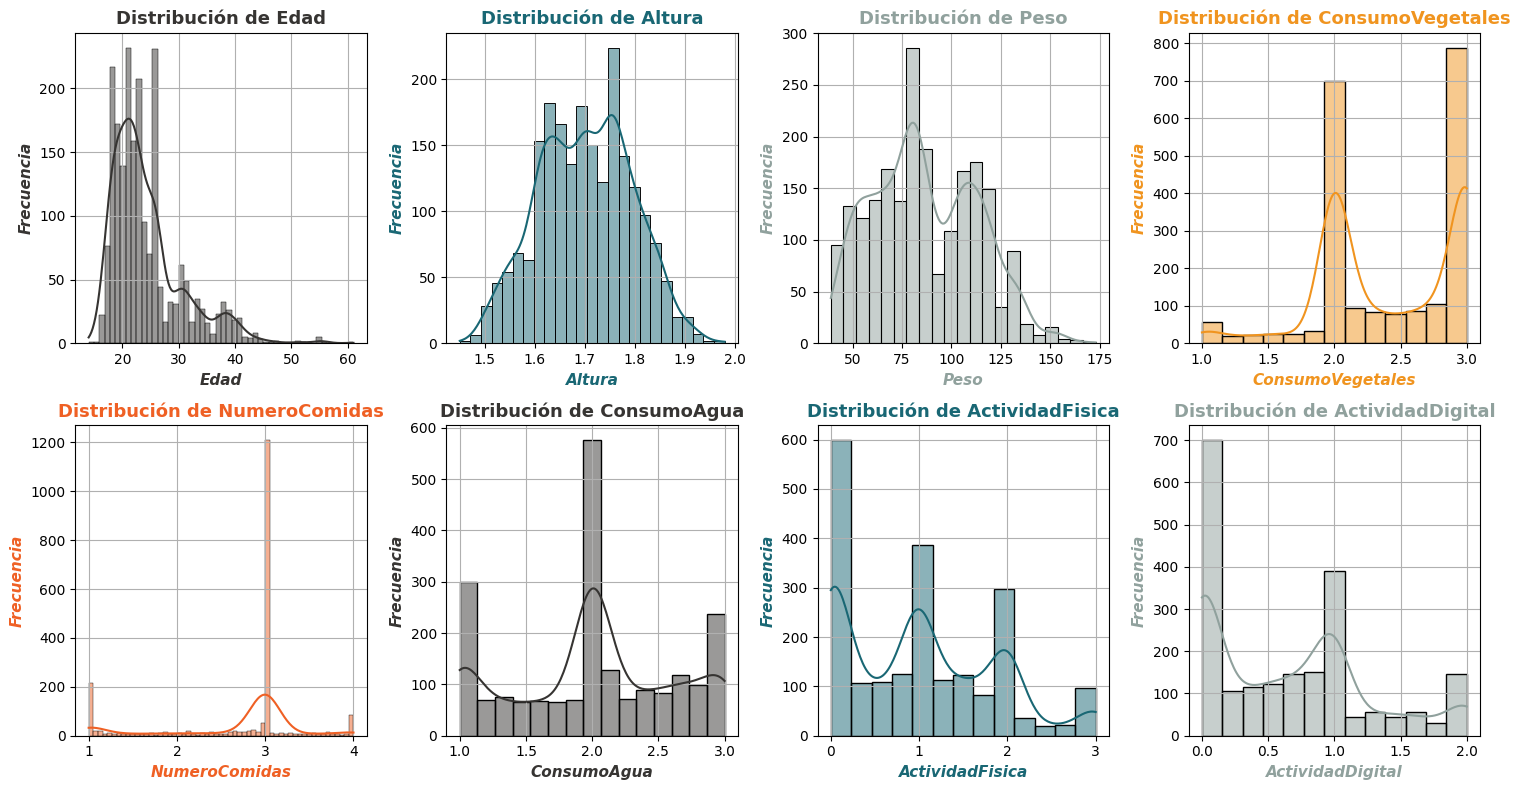

In [13]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(dfNum.columns):
    if c > 4:
        c = 0
    plt.subplot(2, 4, i + 1)
    sns.histplot(dfNum[column], kde=True, color=colores[c])
    plt.title(f"Distribución de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Frecuencia", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

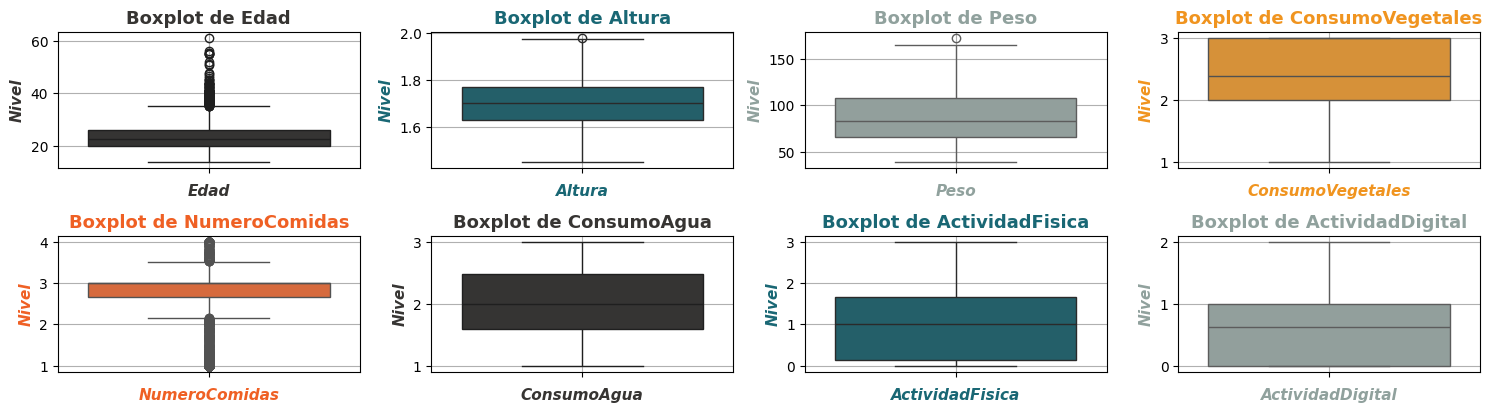

In [14]:
plt.figure(figsize=(15, 8))
c= 0
for i, column in enumerate(dfNum.columns):
    if c > 4:
        c = 0
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data= dfNum[column], color=colores[c])
    plt.title(f"Boxplot de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Nivel", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

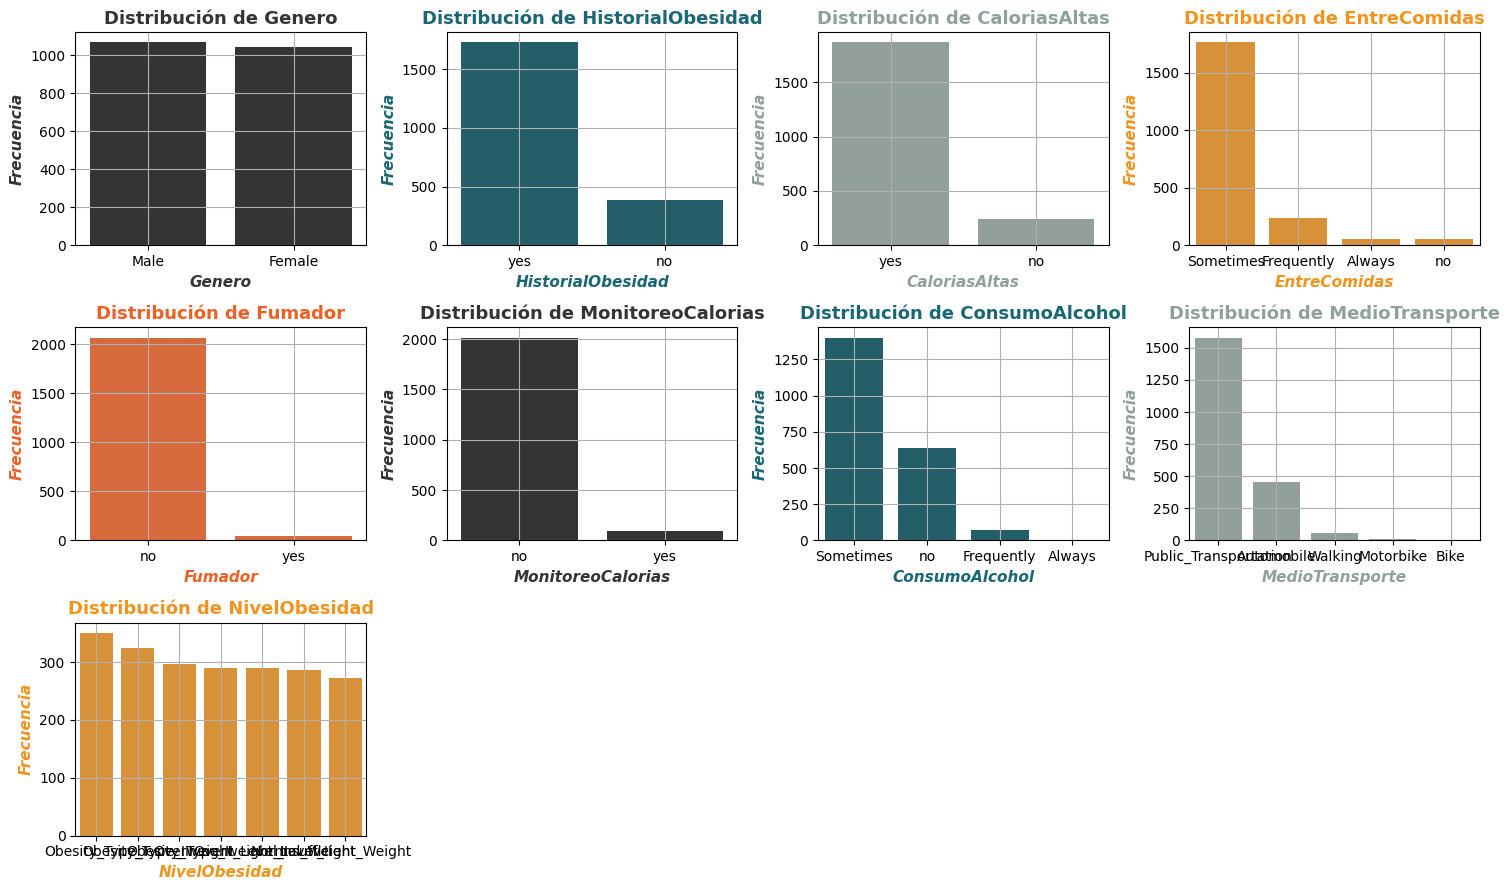

In [15]:
plt.figure(figsize=(15, 9))
c= 0
for i, column in enumerate(dfCat.columns):
    if c > 4:
        c = 0
    plt.subplot(3, 4, i + 1)
    sns.barplot(x=dfCat[column].value_counts().index, y=dfCat[column].value_counts().values, color=colores[c])
    plt.title(f"Distribución de {column}", fontsize=13, color= colores[c], fontweight="bold")
    plt.xlabel(column, fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.ylabel("Frecuencia", fontsize=11, color= colores[c], fontstyle="italic", fontweight="bold")
    plt.grid(True)
    c += 1

plt.tight_layout()
plt.show()

**Notas:**

**Histogramas de variables numéricas:**

- Edad: La distribución de edades parece estar sesgada hacia la derecha, lo que sugiere que la mayoría de los participantes son más jóvenes.
- Altura: La altura muestra una distribución más o menos uniforme, lo que indica una diversidad en las alturas de los participantes.
Peso: La distribución de peso también parece estar sesgada hacia la derecha, lo que sugiere que la mayoría de los participantes tienen un peso relativamente bajo.
- Consumo_Frec_Carbohidratos: La frecuencia de consumo de carbohidratos muestra una distribución que varía, indicando diferentes hábitos alimenticios entre los participantes.
- Numero_Comidas_Principales: La mayoría de los participantes tienen un número moderado de comidas principales.
- Actividad_Fisica_Frec: La frecuencia de actividad física parece estar sesgada hacia la izquierda, lo que sugiere que la mayoría de los participantes realizan actividad física con regularidad.
- Tiempo_Pantalla: La distribución del tiempo de pantalla también parece estar sesgada hacia la izquierda, lo que sugiere que la mayoría de los participantes pasan menos tiempo en dispositivos electrónicos.

**Diagramas de barras de variables categóricas:**

- Género: Hay más participantes del género femenino que del masculino.
Antecedentes_familiares: La mayoría de los participantes tienen antecedentes familiares de obesidad.
- Consumidor_Vegetales: La mayoría de los participantes son consumidores regulares de vegetales.
- Fumador: La mayoría de los participantes no fuman.
- Consumo_Comidas_Extra: La mayoría de los participantes consumen comidas extra.
- Consumidor_Alcohol: La mayoría de los participantes no son consumidores regulares de alcohol.
- Transporte: La mayoría de los participantes utilizan el transporte público.
- Nivel_Obesidad: La distribución de los diferentes niveles de obesidad varía, con algunos tipos siendo más comunes que otros.


## **3. Análisis de relaciones**
---
En esta sección haremos una revisión de las relaciones entre variables para determinar si una variable afecta a otras variables, para esto harémos gráficos y una matriz de correlación.

**Nota:** Es importante tener en cuenta que la matriz de correlación es comúnmente utilizada para explorar la relación lineal entre variables numéricas, sin embargo como en este ejercicio solo tenemos variables categóricas vamos a usar otras correlaciones adecuadas para este tipo de dato.

### **3.1.  Tabla de contingencia múltiple**

También conocida como tabla de contingencia cruzada nos permite visualizar como se distribuyen las categorías de las variables y la variable objetivo.


Tabla de contingencia para Genero y Nivel de Obesidad:
NivelObesidad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Genero                                                              
Female                         173            141             156   
Male                            99            146             195   

NivelObesidad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Genero                                                                 
Female                       2               323                 145   
Male                       295                 1                 145   

NivelObesidad  Overweight_Level_II  
Genero                              
Female                         103  
Male                           187  


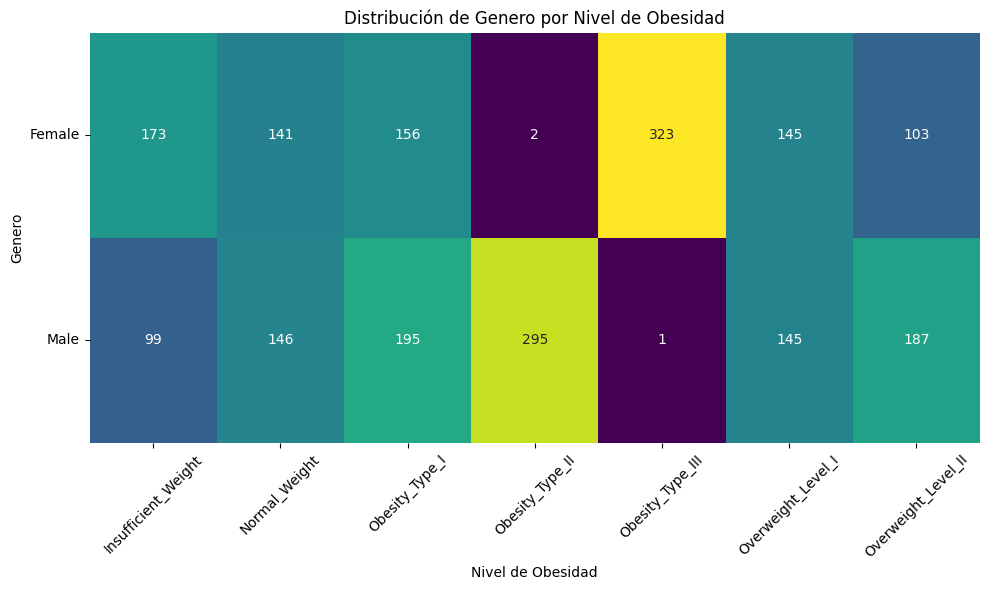


Tabla de contingencia para HistorialObesidad y Nivel de Obesidad:
NivelObesidad      Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
HistorialObesidad                                                       
no                                 146            132               7   
yes                                126            155             344   

NivelObesidad      Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
HistorialObesidad                                                          
no                               1                 0                  81   
yes                            296               324                 209   

NivelObesidad      Overweight_Level_II  
HistorialObesidad                       
no                                  18  
yes                                272  


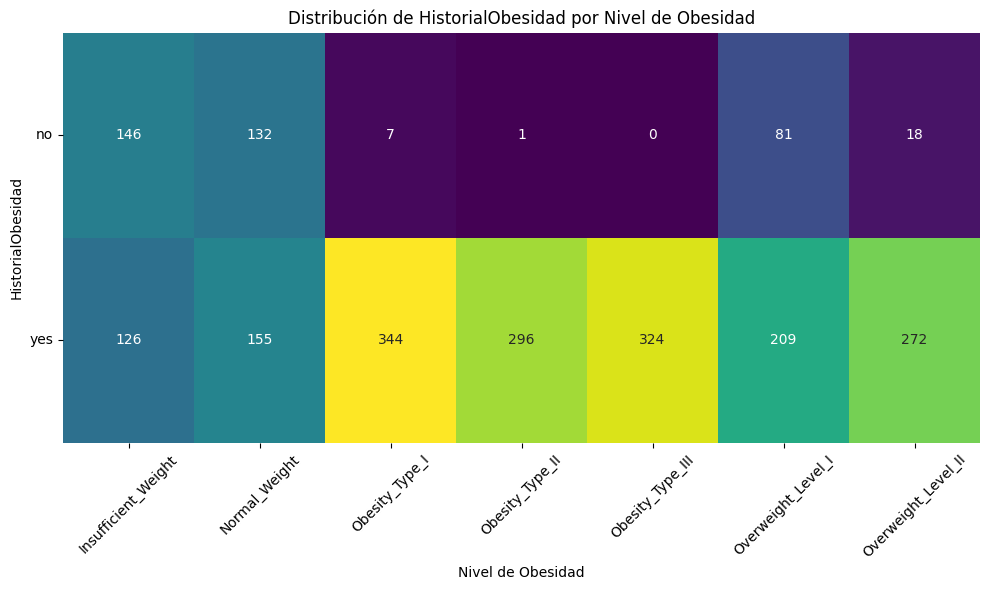


Tabla de contingencia para CaloriasAltas y Nivel de Obesidad:
NivelObesidad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CaloriasAltas                                                       
no                              51             79              11   
yes                            221            208             340   

NivelObesidad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CaloriasAltas                                                          
no                           7                 1                  22   
yes                        290               323                 268   

NivelObesidad  Overweight_Level_II  
CaloriasAltas                       
no                              74  
yes                            216  


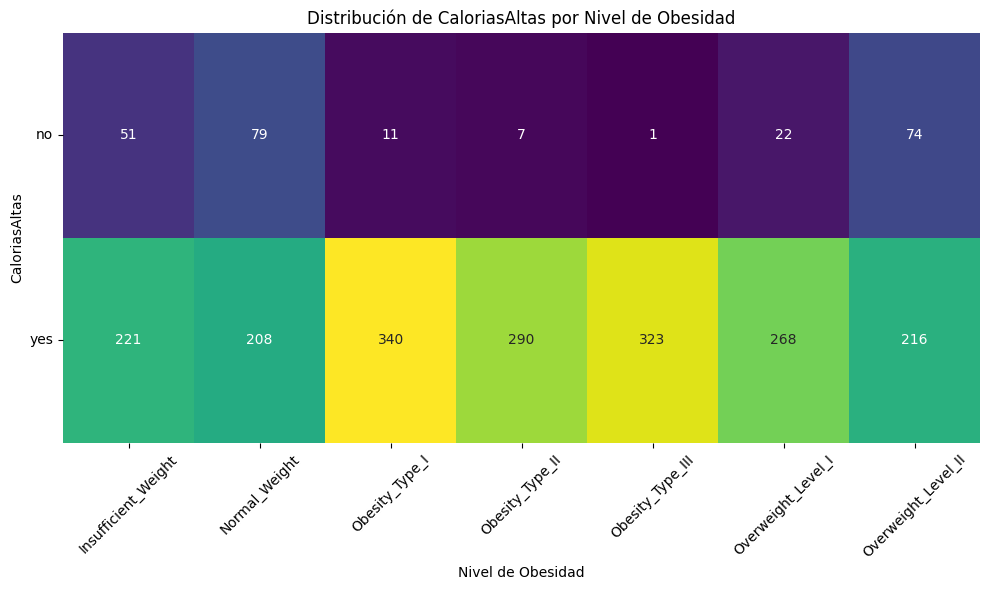


Tabla de contingencia para EntreComidas y Nivel de Obesidad:
NivelObesidad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
EntreComidas                                                        
Always                           2             35               6   
Frequently                     121             83               6   
Sometimes                      146            159             338   
no                               3             10               1   

NivelObesidad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
EntreComidas                                                           
Always                       2                 0                   5   
Frequently                   1                 1                  14   
Sometimes                  293               323                 236   
no                           1                 0                  35   

NivelObesidad  Overweight_Level_II  
EntreComidas                        
Always          

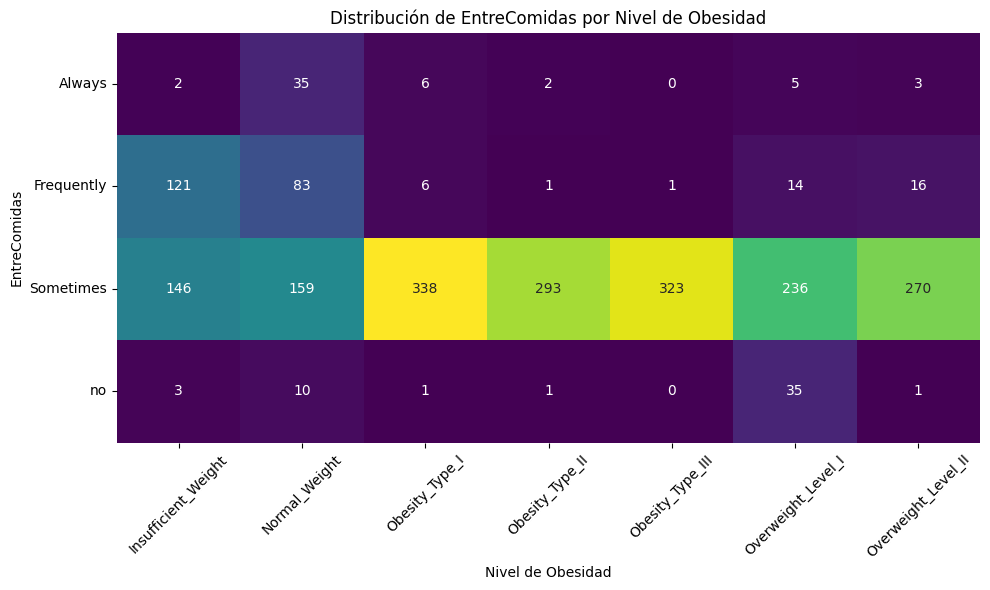


Tabla de contingencia para Fumador y Nivel de Obesidad:
NivelObesidad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Fumador                                                             
no                             271            274             345   
yes                              1             13               6   

NivelObesidad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Fumador                                                                
no                         282               323                 287   
yes                         15                 1                   3   

NivelObesidad  Overweight_Level_II  
Fumador                             
no                             285  
yes                              5  


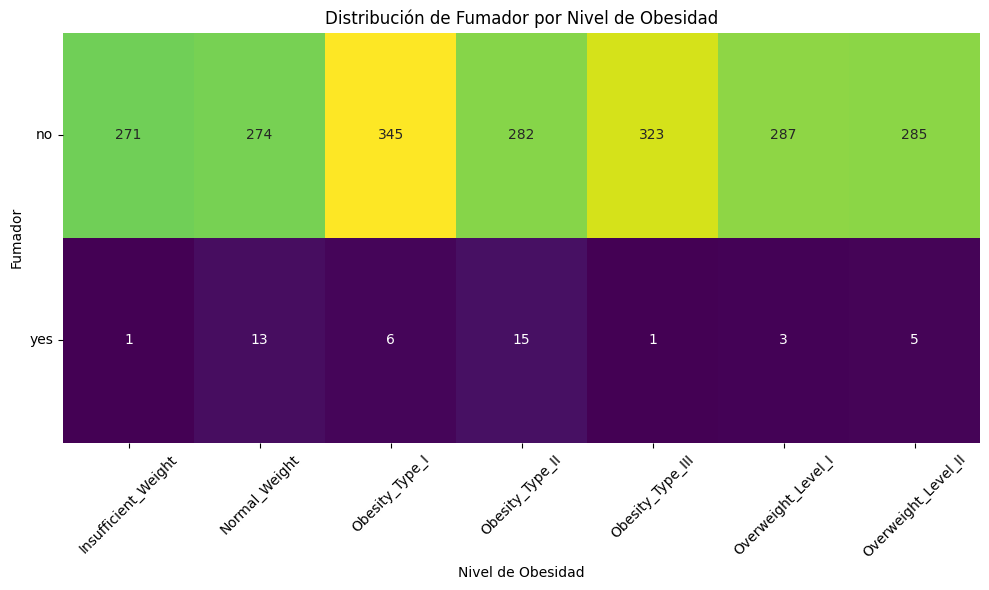


Tabla de contingencia para MonitoreoCalorias y Nivel de Obesidad:
NivelObesidad      Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
MonitoreoCalorias                                                       
no                                 250            257             349   
yes                                 22             30               2   

NivelObesidad      Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
MonitoreoCalorias                                                          
no                             296               324                 253   
yes                              1                 0                  37   

NivelObesidad      Overweight_Level_II  
MonitoreoCalorias                       
no                                 286  
yes                                  4  


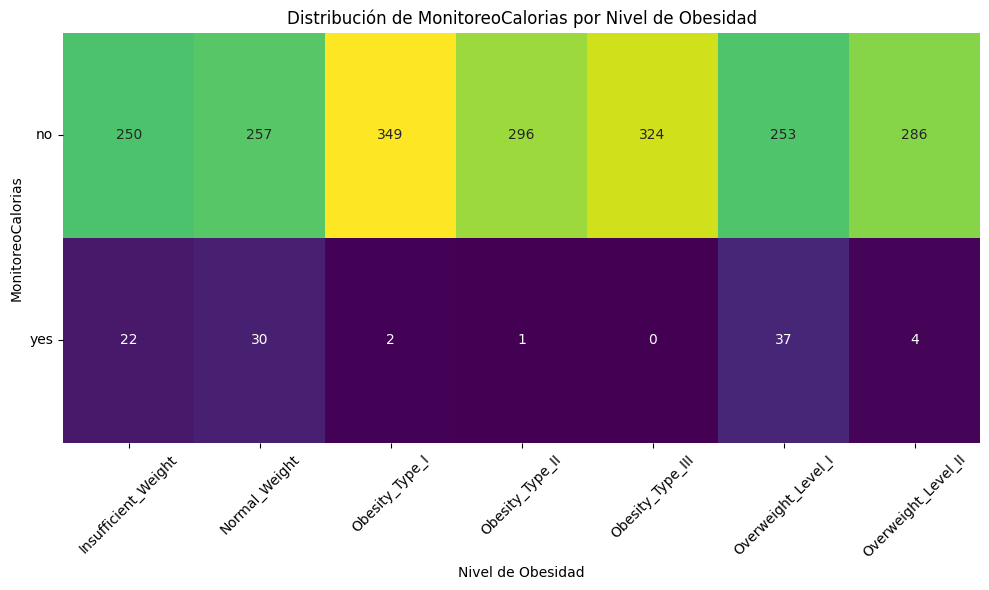


Tabla de contingencia para ConsumoAlcohol y Nivel de Obesidad:
NivelObesidad   Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
ConsumoAlcohol                                                       
Always                            0              1               0   
Frequently                        1             18              14   
Sometimes                       154            161             172   
no                              117            107             165   

NivelObesidad   Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
ConsumoAlcohol                                                          
Always                        0                 0                   0   
Frequently                    2                 0                  16   
Sometimes                   224               323                 224   
no                           71                 1                  50   

NivelObesidad   Overweight_Level_II  
ConsumoAlcohol                       


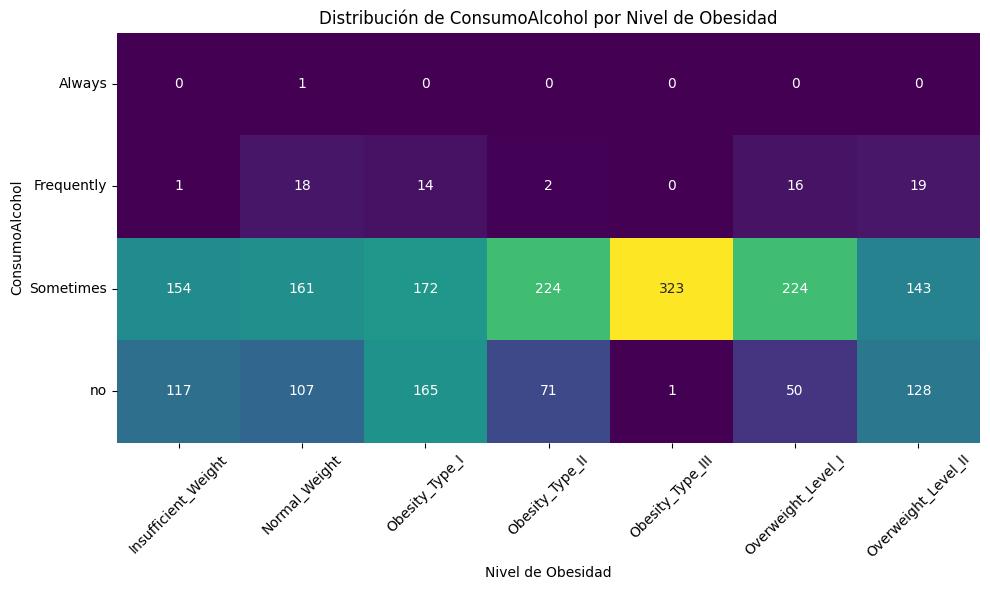


Tabla de contingencia para MedioTransporte y Nivel de Obesidad:
NivelObesidad          Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
MedioTransporte                                                             
Automobile                              46             45             110   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  220            200             236   
Walking                                  6             32               2   

NivelObesidad          Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
MedioTransporte                                                                
Automobile                          95                 1                  66   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   

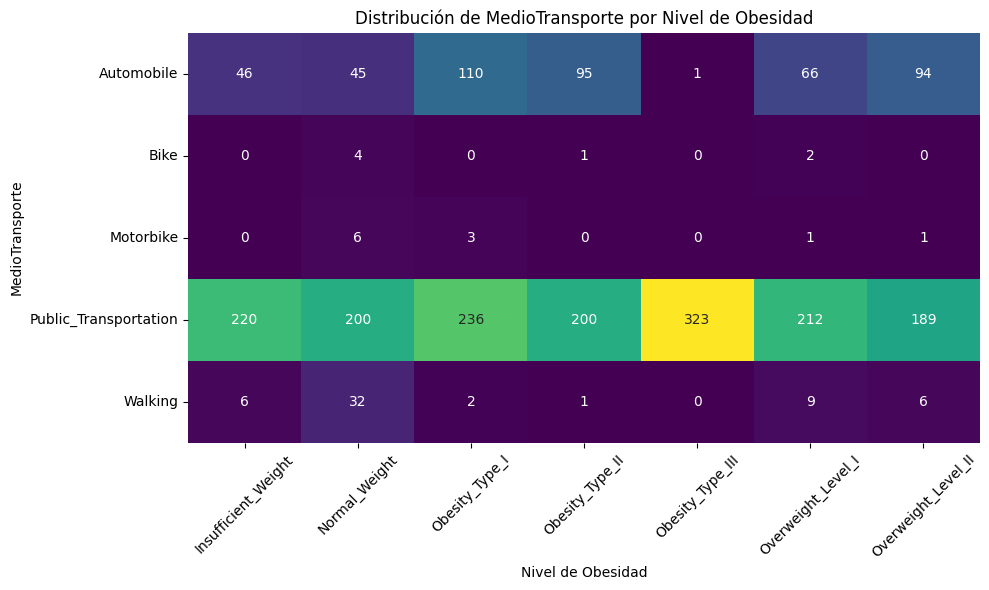


Tabla de contingencia para NivelObesidad y Nivel de Obesidad:
NivelObesidad        Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
NivelObesidad                                                             
Insufficient_Weight                  272              0               0   
Normal_Weight                          0            287               0   
Obesity_Type_I                         0              0             351   
Obesity_Type_II                        0              0               0   
Obesity_Type_III                       0              0               0   
Overweight_Level_I                     0              0               0   
Overweight_Level_II                    0              0               0   

NivelObesidad        Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
NivelObesidad                                                                
Insufficient_Weight                0                 0                   0   
Normal_Weight              

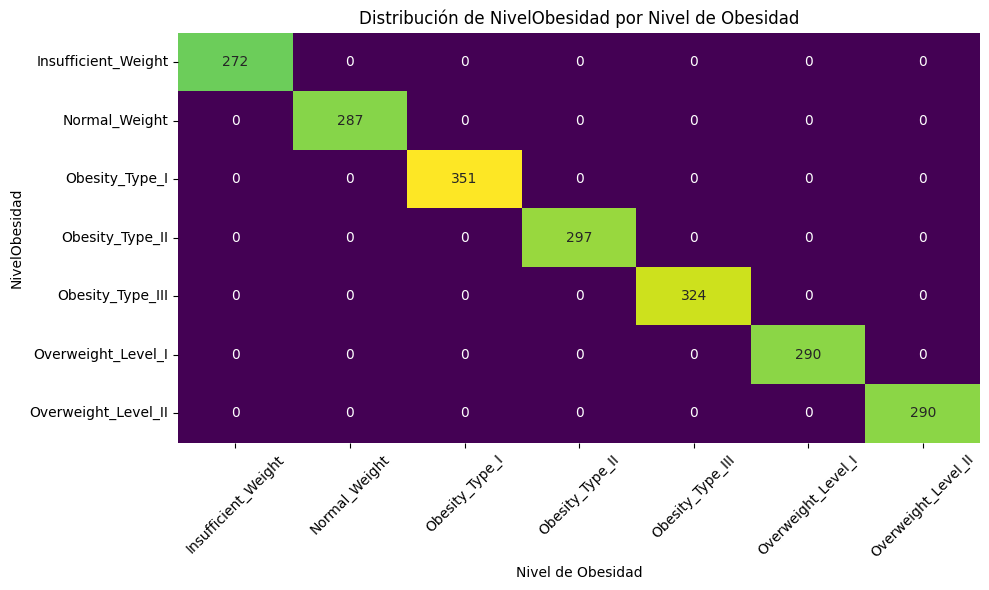

In [16]:
# Lista de variables categóricas
variables_categoricas = ['Genero', 'HistorialObesidad', 'CaloriasAltas','EntreComidas', 'Fumador', 'MonitoreoCalorias', 'ConsumoAlcohol',
                         'MedioTransporte', 'NivelObesidad']

# Iterar sobre cada variable categórica
for variable in variables_categoricas:
    # Calcular tabla de contingencia
    tabla_contingencia = pd.crosstab(df[variable], df['NivelObesidad'])

    # Imprimir tabla de contingencia
    print(f"\nTabla de contingencia para {variable} y Nivel de Obesidad:")
    print(tabla_contingencia)

    # Visualizar tabla de contingencia con gráfico de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(tabla_contingencia, annot=True, cmap='viridis', fmt='d', cbar=False)
    plt.title(f'Distribución de {variable} por Nivel de Obesidad')
    plt.xlabel('Nivel de Obesidad')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

**Notas**

**1. Género**

Mujeres: Predominan en las categorías de "Peso Normal" y "Sobrepeso Nivel I".
Hombres: Tienen una mayor proporción en "Obesidad Tipo I" y "Obesidad Tipo II".
Interpretación: Esto sugiere que las mujeres en la muestra tienden a mantener un peso más cercano al rango normal en comparación con los hombres. Las diferencias pueden deberse a factores socioculturales, biológicos o comportamentales.

**2. Antecedentes Familiares de Obesidad**

Personas con antecedentes familiares: Mayor incidencia en niveles más altos de obesidad.
Personas sin antecedentes familiares: Mayor prevalencia de "Peso Normal".
Los antecedentes familiares parecen ser un factor de riesgo significativo para desarrollar obesidad, lo que sugiere una posible predisposición genética o influencias familiares compartidas.

**3. Consumo Favorito de Vegetales (FAVC)**

Consumidores de vegetales: Mayor proporción en "Peso Normal".
No consumidores de vegetales: Mayor proporción en niveles más altos de obesidad.
Consumir vegetales regularmente está asociado con un menor riesgo de obesidad, probablemente debido a una dieta más equilibrada y rica en nutrientes.

**4. Hábito de Fumar**

Fumadores: Tendencia a una distribución más variada, con presencia en "Peso Normal" y "Obesidad Tipo I".
No fumadores: Predominan en "Peso Normal".
El hábito de fumar tiene una relación compleja con la obesidad. Aunque algunos estudios sugieren que fumar puede estar asociado con un menor peso corporal, otros muestran que los fumadores pueden tener un mayor riesgo de obesidad central.

**5. Consumo Frecuente de Comidas Extra (CAEC)**

Alta frecuencia de consumo: Mayor proporción en niveles más altos de obesidad.
Baja frecuencia de consumo: Mayor proporción en "Peso Normal".
Un mayor consumo de comidas extra está claramente asociado con niveles más altos de obesidad, probablemente debido a un exceso de calorías.

**6. Problemas de Salud (SCC)**

Con problemas de salud: Mayor proporción en niveles altos de obesidad.
Sin problemas de salud: Mayor proporción en "Peso Normal".
La presencia de problemas de salud puede estar relacionada tanto con la causa como con la consecuencia de la obesidad.

**7. Medio de Transporte**

Transporte activo (caminar, bicicleta): Mayor proporción en "Peso Normal".
Transporte pasivo (automóvil, transporte público): Mayor proporción en niveles más altos de obesidad.
Los modos de transporte activo están asociados con un menor riesgo de obesidad debido al mayor gasto energético.


### **3.2. Prueba Chi Cuadrado**

Se realizaron pruebas de chi-cuadrado utilizando variables categóricas codificadas para evaluar la asociación entre diversos factores y el nivel de obesidad en la población estudiada. Estas pruebas permitieron examinar la independencia entre cada variable categórica y el nivel de obesidad, proporcionando así información crucial sobre los factores que podrían influir en la predisposición a la obesidad.

In [17]:
# Lista de variables categóricas codificadas
categorical_vars_encoded = ['Genero', 'HistorialObesidad', 'CaloriasAltas','EntreComidas', 'Fumador', 'MonitoreoCalorias', 'ConsumoAlcohol',
                         'MedioTransporte']

# Matriz para almacenar los resultados de las pruebas de chi-cuadrado
chi2_results_encoded = pd.DataFrame(index=categorical_vars_encoded, columns=['Chi2', 'p-value'])

# Realizar prueba de chi-cuadrado para cada variable categórica codificada
for column in categorical_vars_encoded:
    contingency_table = pd.crosstab(df['NivelObesidad'], df[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results_encoded.loc[column, 'Chi2'] = chi2
    chi2_results_encoded.loc[column, 'p-value'] = p

# Mostrar los resultados
print("Resultados de las pruebas de chi-cuadrado con variables categóricas codificadas:")
print(chi2_results_encoded)

Resultados de las pruebas de chi-cuadrado con variables categóricas codificadas:
                         Chi2   p-value
Genero             657.746227       0.0
HistorialObesidad  621.979435       0.0
CaloriasAltas      233.341304       0.0
EntreComidas       802.977282       0.0
Fumador             32.137832  0.000015
MonitoreoCalorias  123.023899       0.0
ConsumoAlcohol      338.57752       0.0
MedioTransporte    292.593948       0.0


**Notas**

De los resultados obtenidos podemos concluir lo siguiente:

**Asociación significativa:** Todos los p-valores son extremadamente bajos (cercanos a cero), lo que indica una asociación altamente significativa entre cada variable categórica y el nivel de obesidad. Esto sugiere que estas variables tienen un impacto significativo en la predisposición a la obesidad en la población estudiada.

**Diferencias por categoría:** Algunas variables, como "Género", "Antecedentes_familiares" y "Consumo_Comidas_Extra", muestran valores de chi-cuadrado relativamente altos, lo que indica diferencias significativas en la distribución de categorías entre los niveles de obesidad.

**Potencial predictivo:** Estos resultados sugieren que las variables examinadas podrían ser predictores útiles del nivel de obesidad en la población estudiada. Identificar estas variables puede ser crucial para desarrollar modelos predictivos precisos y estrategias de intervención efectivas dirigidas a reducir la obesidad y promover estilos de vida saludables.

### **3.3.  Análisis de correspondencia Múltiple (MCA)**

Este análisis nos permite explorar la estructura de las relaciones entre las variables categóricas, reduciendo la dimensionalidad de los datos y representarlos en dos dimensiones para visualizar y explorar las relaciones entre las categorías de variables.

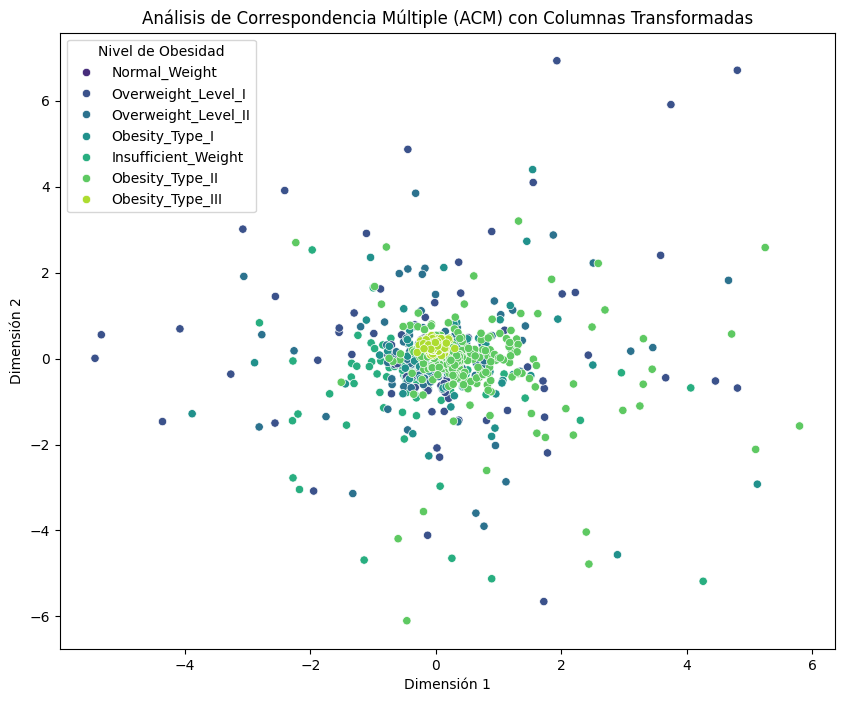

In [18]:
# Selección de variables categóricas transformadas para el análisis
variables_categoricas_transformadas = ['Genero', 'Edad', 'Altura', 'Peso', 'HistorialObesidad', 'CaloriasAltas', 'ConsumoVegetales',
                                       'NumeroComidas', 'EntreComidas', 'Fumador', 'ConsumoAgua', 'MonitoreoCalorias', 'ActividadFisica',
                                       'ActividadDigital', 'ConsumoAlcohol', 'MedioTransporte', 'NivelObesidad']

# Creación del objeto MCA y ajuste del modelo
mca_transformado = MCA(n_components=2)
mca_transformado.fit(df[variables_categoricas_transformadas])

# Obtenemos las coordenadas de las filas en el espacio del ACM
coordinates = mca_transformado.row_coordinates(df[variables_categoricas_transformadas])

# Visualizamos las coordenadas de las filas
plt.figure(figsize=(10, 8))
sns.scatterplot(x=coordinates.iloc[:, 0], y=coordinates.iloc[:, 1], hue=df['NivelObesidad'], palette='viridis')
plt.title('Análisis de Correspondencia Múltiple (ACM) con Columnas Transformadas')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Nivel de Obesidad')
plt.show()

**Notas:**
- Asociaciones entre variables categóricas: Observamos que ciertas categorías están más próximas en el gráfico, lo que sugiere una asociación o similitud entre ellas. Por ejemplo, las categorías relacionadas con el consumo de alimentos y hábitos alimenticios pueden agruparse juntas, mientras que las relacionadas con el comportamiento físico podrían agruparse en otra región.

- Patrones de comportamiento: Podemos identificar patrones claros en los hábitos y comportamientos de las personas representadas en el conjunto de datos. Por ejemplo, podríamos notar que las personas que consumen alcohol tienden a tener hábitos alimenticios específicos o niveles particulares de actividad física.

- Relación con el nivel de obesidad: Si hemos incluido el nivel de obesidad como variable objetivo, podemos observar cómo se distribuyen las categorías en función de este factor. Es posible que encontremos que ciertos patrones de comportamiento o hábitos alimenticios estén asociados con niveles específicos de obesidad.

- Identificación de grupos de riesgo: Podemos identificar grupos o clusters de categorías que están más cercanas entre sí en el espacio del ACM. Estos grupos podrían representar subpoblaciones con características similares que podrían tener un mayor riesgo de obesidad o que podrían beneficiarse de intervenciones específicas de salud.

- Relevancia para la salud pública: Estos hallazgos podrían tener implicaciones importantes para la salud pública, ya que podrían ayudar a identificar factores de riesgo y a desarrollar estrategias de intervención y prevención más efectivas para abordar la obesidad y promover estilos de vida saludables.

### **3.4.  Coeficiente de correlación de Spearman**

Este análisis nos permite explorar la estructura de las relaciones entre las variables categóricas, reduciendo la dimensionalidad de los datos y representarlos en dos dimensiones para visualizar y explorar las relaciones entre las categorías de variables.

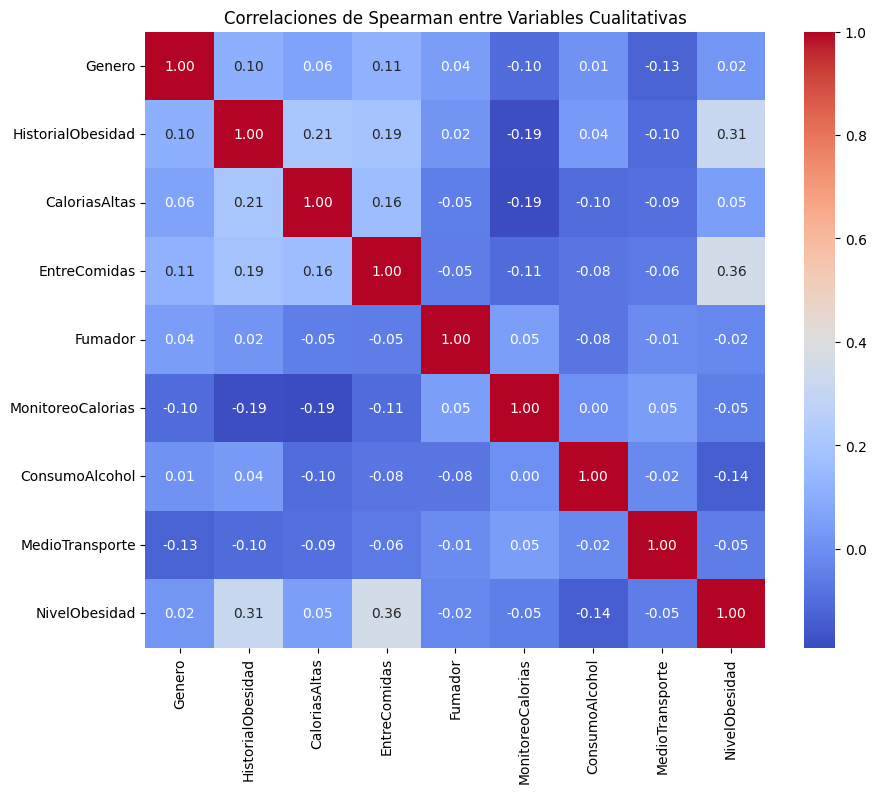

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables cualitativas especificadas en español
variables_cualitativas = ['Genero', 'HistorialObesidad', 'CaloriasAltas','EntreComidas', 'Fumador', 'MonitoreoCalorias', 'ConsumoAlcohol',
                         'MedioTransporte', 'NivelObesidad']

# Seleccionamos las variables cualitativas del DataFrame
variables_categoricas = df[variables_cualitativas]

# Convertimos las variables cualitativas a códigos numéricos
variables_categoricas_encoded = variables_categoricas.apply(lambda x: x.astype('category').cat.codes)

# Calculamos la matriz de correlación de Spearman para las variables cualitativas
correlaciones_spearman_categoricas = variables_categoricas_encoded.corr(method='spearman')

# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Creamos el mapa de calor de las correlaciones de Spearman para las variables cualitativas
sns.heatmap(correlaciones_spearman_categoricas, annot=True, cmap='coolwarm', fmt=".2f")

# Añadimos título
plt.title("Correlaciones de Spearman entre Variables Cualitativas")

# Mostramos la visualización
plt.show()

**Notas:**
- Género vs. Nivel de Obesidad: La correlación entre género y nivel de obesidad parece ser bastante baja, lo que sugiere que el género por sí solo puede no ser un predictor fuerte del nivel de obesidad.

- Antecedentes Familiares vs. Nivel de Obesidad: La correlación entre antecedentes familiares de sobrepeso y nivel de obesidad es moderada, lo que indica que tener antecedentes familiares de sobrepeso puede estar asociado con un mayor nivel de obesidad.

- Consumo de Vegetales vs. Nivel de Obesidad: La correlación entre el consumo de vegetales y el nivel de obesidad es relativamente baja, lo que sugiere que el hábito de consumir vegetales no está fuertemente relacionado con el nivel de obesidad en esta muestra.

- Fumador vs. Nivel de Obesidad: La correlación entre ser fumador y el nivel de obesidad es baja, lo que sugiere que el hábito de fumar no está muy relacionado con el nivel de obesidad.

- Consumo de Alcohol vs. Nivel de Obesidad: La correlación entre el consumo de alcohol y el nivel de obesidad es baja, lo que indica que el consumo de alcohol no está muy relacionado con el nivel de obesidad en esta muestra.

- Consumo de Comidas Extra vs. Nivel de Obesidad: La correlación entre el consumo de comidas extra y el nivel de obesidad es moderada, lo que sugiere que un mayor consumo de comidas extra puede estar asociado con un mayor nivel de obesidad.

- Consumo de Calorías vs. Nivel de Obesidad: La correlación entre el consumo de calorías y el nivel de obesidad es moderada, lo que sugiere que un mayor consumo de calorías puede estar asociado con un mayor nivel de obesidad.

- Transporte vs. Nivel de Obesidad: La correlación entre el tipo de transporte utilizado y el nivel de obesidad es relativamente baja, lo que sugiere que el tipo de transporte no está fuertemente relacionado con el nivel de obesidad en esta muestra.iento podría indicar una correlación inversa aunque no tan significativa.

## **4. Analisis de componentes principales (ACP)**

### **4.1. Reduccion de dimencionalidad**

El PCA es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad de información posible.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genero             2111 non-null   object 
 1   Edad               2111 non-null   float64
 2   Altura             2111 non-null   float64
 3   Peso               2111 non-null   float64
 4   HistorialObesidad  2111 non-null   object 
 5   CaloriasAltas      2111 non-null   object 
 6   ConsumoVegetales   2111 non-null   float64
 7   NumeroComidas      2111 non-null   float64
 8   EntreComidas       2111 non-null   object 
 9   Fumador            2111 non-null   object 
 10  ConsumoAgua        2111 non-null   float64
 11  MonitoreoCalorias  2111 non-null   object 
 12  ActividadFisica    2111 non-null   float64
 13  ActividadDigital   2111 non-null   float64
 14  ConsumoAlcohol     2111 non-null   object 
 15  MedioTransporte    2111 non-null   object 
 16  NivelObesidad      2111 

Varianza explicada por cada componente principal:
[0.22648604 0.18657893]


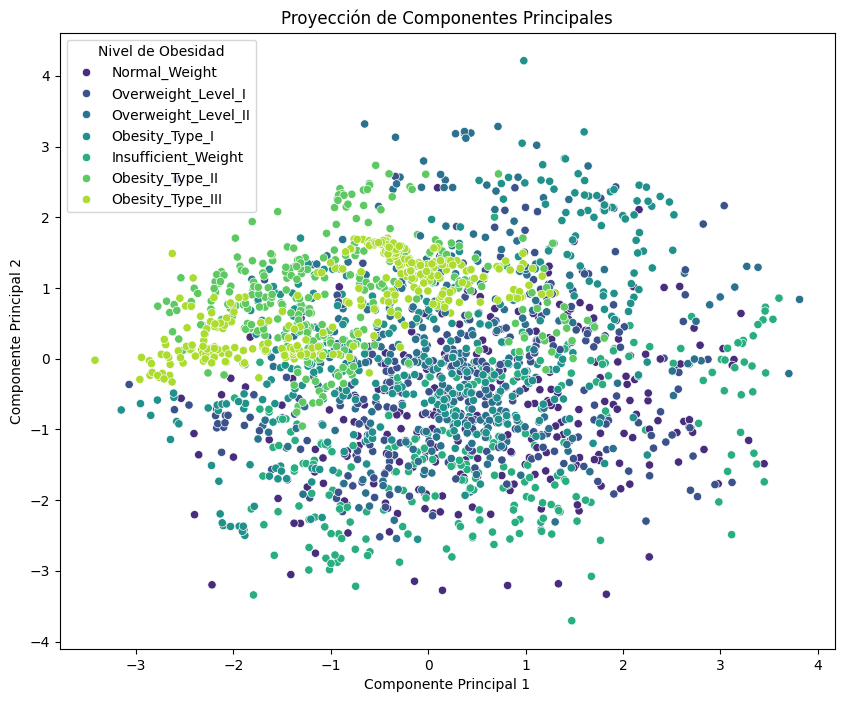

Coeficientes de los componentes principales:
       Edad    Altura      Peso  ConsumoVegetales  NumeroComidas  ConsumoAgua  \
0 -0.007592 -0.598077 -0.503661         -0.161968      -0.333123    -0.384655   
1  0.603802 -0.070295  0.361779          0.260187      -0.127778    -0.052993   

   ActividadFisica  ActividadDigital  
0        -0.321236         -0.014639  
1        -0.361647         -0.531014  


In [21]:
# Seleccionar variables numéricas para ACP
variables_numericas = ['Edad', 'Altura', 'Peso', 'ConsumoVegetales', 'NumeroComidas', 'ConsumoAgua', 'ActividadFisica', 'ActividadDigital']

# Escalado de las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables_numericas])

# Aplicar ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Calcular la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Agregar componentes principales al DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualización de los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='NivelObesidad', data=df, palette='viridis')
plt.title('Proyección de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Nivel de Obesidad')
plt.show()

# Obtener los coeficientes de los componentes principales
componentes_coeficientes = pd.DataFrame(pca.components_, columns=variables_numericas)

# Imprimir los coeficientes
print("Coeficientes de los componentes principales:")
print(componentes_coeficientes)

**Notas**

Con base en la grafica anterior podemos evidenciar lo siguiente:

**1. Agrupamiento y Separación:**

En el gráfico se observan diferentes grupos de puntos de colores, cada uno representando diferentes niveles de obesidad (de 0 a 6).
Hay una gradación visible en los colores, sugiriendo una separación parcial de los niveles de obesidad. Sin embargo, no hay una separación clara y completa entre todos los niveles, lo que indica que algunos niveles de obesidad comparten características similares según las variables seleccionadas.

**2. Distribución y Densidad:**

Los puntos están bastante dispersos, especialmente en las regiones centrales del gráfico. Esto indica que las primeras dos componentes principales (PCA1 y PCA2) explican parte de la varianza, pero no toda la complejidad de los datos.
Los niveles de obesidad más bajos (colores más oscuros) parecen estar más concentrados en la parte inferior izquierda del gráfico, mientras que los niveles de obesidad más altos (colores más claros) están más hacia la parte superior derecha.

**3. Interpretación de PCA1 y PCA2:**

**- PCA1 (Componente Principal 1):** Este componente principal tiene altas cargas negativas de Altura y Peso, lo que sugiere que estos factores contribuyen significativamente a la varianza capturada por este componente. La gradación horizontal puede estar asociada con variaciones en estos atributos.

**-PCA2 (Componente Principal 2):** Este componente está fuertemente influenciado por Edad (positivamente) y Tiempo de Pantalla (negativamente). La gradación vertical en el gráfico podría estar relacionada con estas variables.

**4. Solapamiento:**
Hay un solapamiento considerable entre los niveles de obesidad, especialmente en las categorías intermedias. Esto sugiere que aunque los componentes principales capturan una parte significativa de la varianza, no son suficientes para diferenciar completamente todos los niveles de obesidad.

Conclusiones:

**Separación Parcial:**

Los componentes principales capturan cierta estructura en los datos y permiten una separación parcial de los niveles de obesidad. Los niveles de obesidad más bajos y más altos se diferencian mejor en el gráfico, mientras que las categorías intermedias muestran un mayor solapamiento.

**Necesidad de Más Componentes:**

Dado que PCA1 y PCA2 explican conjuntamente alrededor del 41.32% de la varianza total, se sugiere que hay información significativa en los componentes adicionales. Incluir más componentes podría mejorar la diferenciación de los niveles de obesidad.

**Relevancia de Variables:**

La influencia de Altura, Peso, Edad y Tiempo de Pantalla es significativa en la separación observada. Las políticas o intervenciones relacionadas con la obesidad podrían centrarse en estos factores para ser más efectivas.

## **5. Definicion de Clusteres**

### **5.1 K-Means y Contraste con Variable Objetivo**

Aplicamos K-means para agrupar los datos en clusters. El número de clusters puede ser determinado a priori o usando un método como el codo para encontrar el número óptimo de clusters.

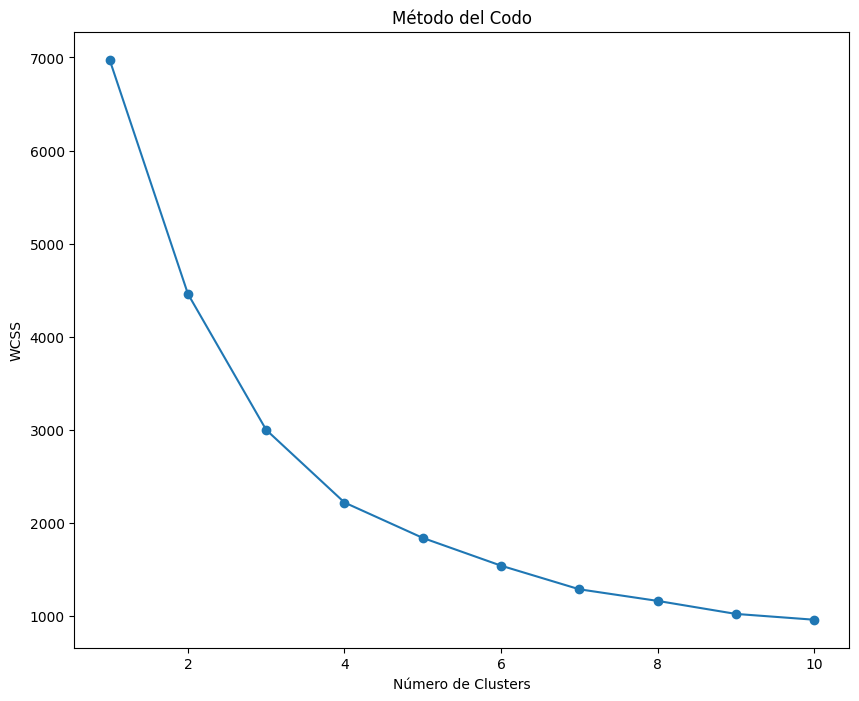

In [22]:
from sklearn.cluster import KMeans

# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Elegir el número de clusters (ejemplo con 7 clusters)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Agregar resultados de clustering al DataFrame
df['Cluster'] = clusters

El gráfico del método del codo muestra la suma de los errores cuadráticos dentro de los clusters (WCSS) en función del número de clusters. El objetivo es encontrar el punto donde la disminución de WCSS comienza a ser menos pronunciada, lo que indica un buen equilibrio entre la compacidad y la separación de los clusters. En este caso, parece que el "codo" está alrededor de 4-5 clusters.

Podemos proceder con 4 o 5 clusters y realizar el análisis de clustering.

### **5.2. Realizar Clustering con K-means (4 o 5 clusters)**

Vamos a proceder con 5 clusters

In [23]:
from sklearn.cluster import KMeans

# Aplicar K-means con 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Agregar resultados de clustering al DataFrame
df['Cluster'] = clusters

### **5.3. Visualizar los Resultados del Clustering**

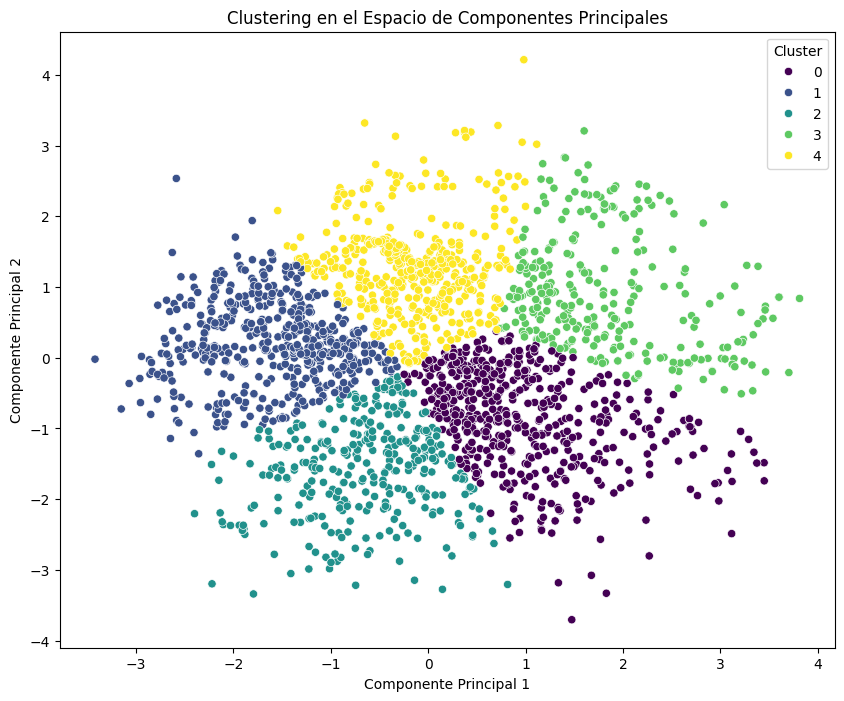

In [24]:
# Visualización de los clusters en el espacio de los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering en el Espacio de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

### **5.4. Análisis de los Clusters**

In [25]:
numerical_columns = df.select_dtypes(include=['number']).columns

In [26]:
# Descripción de los clusters
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()
print(cluster_summary)

# Análisis de la distribución de los niveles de obesidad en cada cluster
cluster_obesity_distribution = df.groupby('Cluster')['NivelObesidad'].value_counts(normalize=True).unstack()
print(cluster_obesity_distribution)

              Edad    Altura        Peso  ConsumoVegetales  NumeroComidas  \
Cluster                                                                     
0        20.551255  1.651122   67.518182          2.189859       2.560526   
1        24.237835  1.792401  114.749199          2.579723       2.938822   
2        20.203985  1.752610   72.674073          2.253231       3.038397   
3        27.464247  1.593111   70.944822          2.420528       1.968471   
4        29.668396  1.697947   98.971397          2.633108       2.769758   

         ConsumoAgua  ActividadFisica  ActividadDigital      PCA1      PCA2  \
Cluster                                                                       
0           1.834772         0.858634          0.921935  0.978198 -0.825332   
1           2.312464         1.404194          0.601280 -1.619012  0.205871   
2           2.254259         1.850233          1.150645 -0.638509 -1.568704   
3           1.535778         0.364033          0.306975  1.848812

De la grafica anterior podemos evidenciar lo siguiente:

**Distribución de Clusters:**

**- Cluster 0:** Este cluster se encuentra principalmente en la parte superior central del gráfico, con una ligera inclinación hacia la derecha.

**- Cluster 1:** Este cluster se distribuye en la parte central del gráfico, con una dispersión hacia los lados.

**- Cluster 2:** Este cluster se encuentra en la parte izquierda del gráfico, extendiéndose un poco hacia abajo.

**- Cluster 3:** Este cluster se sitúa en la parte inferior izquierda del gráfico.

**-Cluster 4:** Este cluster se agrupa en la parte derecha del gráfico, con una dispersión hacia arriba.

**Separación de Clusters:**

Hay una clara separación entre los clusters, especialmente entre los clusters 3 y 4, que están en los extremos opuestos del gráfico.

Los clusters 0, 1 y 2 muestran cierta superposición, pero aún se pueden distinguir como grupos separados.

*Resumen de Clusters*

**-Cluster 0**

* Género: Predominantemente femenino (36.17% masculino).

* Edad: Promedio de 30.8 años.

* Altura: Promedio de 1.67 m.

* Peso: Promedio de 94.6 kg.

* Antecedentes Familiares: 95.26% tienen antecedentes familiares de obesidad.

* Consumo de Vegetales: 94.27% consumen vegetales.

* Frecuencia de Carbohidratos: 2.61 veces por semana.

* Número de Comidas Principales: Promedio de 2.65.

* Consumo de Comidas Extra: Promedio de 1.08.

* Fumador: 1.98%.

* Consumo de Agua: Promedio de 1.89 litros por día.

* Consumo de Alcohol: 1.19%.

* Frecuencia de Actividad Física: 0.48 veces por semana.

* Tiempo de Pantalla: 0.28 horas por día.

* Consumo de Calorías: 0.75.

* Transporte: 47.04% usan transporte público.

* Nivel de Obesidad: Promedio de 4.32 (obesidad severa).

**Cluster 1**

* Género: 47.14% masculino.

* Edad: Promedio de 21 años.

* Altura: Promedio de 1.67 m.

* Peso: Promedio de 70.0 kg.

* Antecedentes Familiares: 71.07% tienen antecedentes familiares.

* Consumo de Vegetales: 83.39% consumen vegetales.

* Frecuencia de Carbohidratos: 2.23 veces por semana.

* Número de Comidas Principales: Promedio de 2.70.

* Consumo de Comidas Extra: Promedio de 1.20.

* Fumador: 1.43%.

* Consumo de Agua: Promedio de 1.93 litros por día.

* Consumo de Alcohol: 5.71%.

* Frecuencia de Actividad Física: 0.98 veces por semana.

* Tiempo de Pantalla: 0.86 horas por día.

* Consumo de Calorías: 0.66.

* Transporte: 16.07% usan transporte público.

* Nivel de Obesidad: Promedio de 1.94 (peso normal a sobrepeso leve).

**Cluster 2**

* Género: Predominantemente masculino (71.19% masculino).

* Edad: Promedio de 24.8 años.

* Altura: Promedio de 1.79 m.

* Peso: Promedio de 114.5 kg.

* Antecedentes Familiares: 95.54% tienen antecedentes familiares.

* Consumo de Vegetales: 95.72% consumen vegetales.

* Frecuencia de Carbohidratos: 2.57 veces por semana.

* Número de Comidas Principales: Promedio de 2.92.

* Consumo de Comidas Extra: Promedio de 1.06.

* Fumador: 2.79%.

* Consumo de Agua: Promedio de 2.29 litros por día.

* Consumo de Alcohol: 1.86%.

* Frecuencia de Actividad Física: 1.32 veces por semana.

* Tiempo de Pantalla: 0.58 horas por día.

* Consumo de Calorías: 0.94.

* Transporte: 28.25% usan transporte público.

* Nivel de Obesidad: Promedio de 4.54 (obesidad severa).

**Cluster 3**

* Género: Predominantemente masculino (76.60% masculino).

* Edad: Promedio de 20 años.

* Altura: Promedio de 1.76 m.

* Peso: Promedio de 73.0 kg.

* Antecedentes Familiares: 79.62% tienen antecedentes familiares.

* Consumo de Vegetales: 84.91% consumen vegetales.

* Frecuencia de Carbohidratos: 2.24 veces por semana.

* Número de Comidas Principales: Promedio de 3.08.

* Consumo de Comidas Extra: Promedio de 1.22.

* Fumador: 2.64%.

* Consumo de Agua: Promedio de 2.30 litros por día.

* Consumo de Alcohol: 5.66%.

* Frecuencia de Actividad Física: 2.01 veces por semana.

* Tiempo de Pantalla: 1.20 horas por día.

* Consumo de Calorías: 0.55.

* Transporte: 37.74% usan transporte público.

* Nivel de Obesidad: Promedio de 1.58 (peso normal a sobrepeso leve).

**Cluster 4**

* Género: Predominantemente femenino (85.37% femenino).

* Edad: Promedio de 22.1 años.

* Altura: Promedio de 1.58 m.

* Peso: Promedio de 60.9 kg.

* Antecedentes Familiares: 50.00% tienen antecedentes familiares.

* Consumo de Vegetales: 75.21% consumen vegetales.

* Frecuencia de Carbohidratos: 2.31 veces por semana.

* Número de Comidas Principales: Promedio de 1.78.

* Consumo de Comidas Extra: Promedio de 1.25.

* Fumador: 1.65%.

* Consumo de Agua: Promedio de 1.48 litros por día.

* Consumo de Alcohol: 13.64%.

* Frecuencia de Actividad Física: 0.41 veces por semana.

* Tiempo de Pantalla: 0.56 horas por día.

* Consumo de Calorías: 0.60.

* Transporte: 20.66% usan transporte público.

* Nivel de Obesidad: Promedio de 1.78 (peso normal a sobrepeso leve).

* Distribución de Niveles de Obesidad por Cluster

Ahora veamos la distribucion de obesidad por cluster

**Cluster 0**

* Obesidad nivel 6: 34.59%

* Obesidad nivel 5: 17.39%

* Obesidad nivel 4: 15.42%

* Obesidad nivel 3: 18.38%

* Otros niveles son menores.

**Cluster 1**

* Distribución equilibrada con una mayor prevalencia en niveles de obesidad leves a moderados.

**Cluster 2**

* Obesidad nivel 6: 27.70%

* Obesidad nivel 5: 34.76%

* Obesidad nivel 4: 18.22%

* Otros niveles son menores.

**Cluster 3**

* Distribución equilibrada con una menor prevalencia de obesidad severa.

**Cluster 4**

* Distribución equilibrada con una menor prevalencia de obesidad severa.

**CONCLUSIONES**

**Cluster 0 y 2:** Estos clusters tienen altos niveles de obesidad (promedios de 4.32 y 4.54). Requieren intervenciones urgentes, como programas de reducción de peso, mejora de la actividad física, y dietas saludables.

**Cluster 1, 3 y 4:** Aunque tienen menor prevalencia de obesidad severa, la presencia de sobrepeso indica que también necesitan monitoreo y programas de mantenimiento de peso y promoción de estilos de vida saludables.

**Diferenciación por Género:** Los clusters muestran diferencias notables en la composición de género, lo cual sugiere que las intervenciones podrían necesitar ser personalizadas según el género para ser más efectivas.

**Antecedentes Familiares:** La mayoría de los clusters tienen una alta prevalencia de antecedentes familiares de obesidad, indicando una predisposición genética que debe ser considerada en las intervenciones.

**Actividad Física y Consumo de Vegetales:** Los clusters con menor actividad física y menor consumo de vegetales (por ejemplo, Cluster 4) deben enfocarse en programas que promuevan estos hábitos saludables.



**CONCLUSIONES FINALES**

**1. Separación Parcial y Necesidad de Componentes Adicionales:**

El análisis de componentes principales (PCA) permitió una separación parcial de los niveles de obesidad, destacando que PCA1 y PCA2 explican conjuntamente alrededor del 41.32% de la varianza total. Sin embargo, hay un solapamiento significativo entre los niveles de obesidad, especialmente en las categorías intermedias. Esto sugiere la necesidad de incluir componentes adicionales para capturar más varianza y mejorar la diferenciación de los niveles de obesidad.

**2. Identificación de Clusters Distintos:**

El análisis de clustering con K-means identificó cinco clusters con características distintivas:

Clusters 0 y 2: Ambos presentan altos niveles de obesidad (promedios de 4.32 y 4.54 respectivamente), predominantemente con individuos con antecedentes familiares de obesidad, baja frecuencia de actividad física, y un consumo elevado de calorías. Estos clusters requieren intervenciones urgentes para la reducción de peso y la promoción de hábitos de vida saludables.
Clusters 1, 3 y 4: Estos clusters tienen menor prevalencia de obesidad severa, pero muestran una presencia significativa de sobrepeso. La frecuencia de actividad física y el consumo de vegetales son variables críticas a mejorar en estos grupos.

**3. Diferenciación por Género y Edad:**

Hay diferencias notables en la composición de género entre los clusters, lo cual sugiere que las intervenciones deben ser personalizadas según el género. Los clusters también varían en edad promedio, indicando que las estrategias deben considerar la etapa de vida de los individuos.

**4. Importancia de los Antecedentes Familiares:**

La mayoría de los clusters tienen una alta prevalencia de antecedentes familiares de obesidad, indicando una predisposición genética que debe ser considerada en las intervenciones. Esto subraya la necesidad de enfoques personalizados que consideren tanto factores genéticos como ambientales.

**5. Influencia de la Actividad Física y Consumo de Vegetales:**

Los clusters con menor actividad física y menor consumo de vegetales, como el Cluster 4, deben enfocarse en programas que promuevan estos hábitos saludables. La actividad física y el consumo de vegetales son factores clave en la gestión del peso y la prevención de la obesidad.


**RECOMENDACIONES**

**1. Programas de Educación y Concienciación:**

Fomentar la educación sobre nutrición y la importancia del ejercicio regular, especialmente en clusters con menor actividad física y mayores niveles de obesidad.

**2. Intervenciones Específicas y Personalizadas:**

Diseñar programas específicos para clusters con altos niveles de obesidad, como los Clusters 0 y 2, que incluyan asesoramiento dietético y programas de ejercicio físico. Considerar las diferencias de género y edad para personalizar las intervenciones.

**3. Seguimiento y Evaluación Continuos:**

Implementar sistemas de seguimiento para evaluar el progreso de cada cluster en términos de reducción de peso y mejora de hábitos de vida. Ajustar las intervenciones según sea necesario para asegurar su efectividad.

**4. Atención a los Antecedentes Familiares:**

Incorporar estrategias que consideren la predisposición genética a la obesidad, ofreciendo apoyo adicional a aquellos con antecedentes familiares para prevenir la progresión de la obesidad.

**5. Promoción de Hábitos Saludables:**

Desarrollar campañas de promoción de hábitos saludables, centradas en aumentar la actividad física y el consumo de vegetales, especialmente en clusters identificados con bajos niveles en estas áreas.



## **6. Codificacion de variables**

En esta sección codificaremos las variables categóricas de nuestro dataframe original con el objetivo de mejorar el rendimiento de los modelos que vamos a realizar y poder realizar mejores análisis. Si bien, existen métodos de codificación como OneHotEncoder hemos decidido hacerlo manualmente con el fin de tener claros los números que reemplazarán las categorías.

In [27]:
df.columns

Index(['Genero', 'Edad', 'Altura', 'Peso', 'HistorialObesidad',
       'CaloriasAltas', 'ConsumoVegetales', 'NumeroComidas', 'EntreComidas',
       'Fumador', 'ConsumoAgua', 'MonitoreoCalorias', 'ActividadFisica',
       'ActividadDigital', 'ConsumoAlcohol', 'MedioTransporte',
       'NivelObesidad', 'PCA1', 'PCA2', 'Cluster'],
      dtype='object')

In [28]:
# Creamos un diccionario que nos permite establecer los valores de reemplazo para cada columna.
mapGenero = {'Female': 0, 'Male': 1}
mapHistorial = {'no': 0, 'yes': 1}
mapCaloriasAltas = {'no': 0, 'yes': 1}
mapEntreComidas = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
mapFumador = {'no': 0, 'yes': 1}
mapMonitoreoCalorias = {'no': 0, 'yes': 1}
mapConsumoAlcohol = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
mapTransporte = {'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 3, 'Bike': 4}
mapNivelObesidad = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

# Reemplazamos los valores utilizando el método map para cada columna.
df['Genero'] = df['Genero'].map(mapGenero)
df['HistorialObesidad'] = df['HistorialObesidad'].map(mapHistorial)
df['CaloriasAltas'] = df['CaloriasAltas'].map(mapCaloriasAltas)
df['EntreComidas'] = df['EntreComidas'].map(mapEntreComidas)
df['Fumador'] = df['Fumador'].map(mapFumador)
df['MonitoreoCalorias'] = df['MonitoreoCalorias'].map(mapMonitoreoCalorias)
df['ConsumoAlcohol'] = df['ConsumoAlcohol'].map(mapConsumoAlcohol)
df['MedioTransporte'] = df['MedioTransporte'].map(mapTransporte)
df['NivelObesidad'] = df['NivelObesidad'].map(mapNivelObesidad)


# Verificar los cambios
df.head()

# Mostrar las primeras filas del DataFrame con las variables codificadas
print(df.head())

   Genero  Edad  Altura  Peso  HistorialObesidad  CaloriasAltas  \
0       0  21.0    1.62  64.0                  1              0   
1       0  21.0    1.52  56.0                  1              0   
2       1  23.0    1.80  77.0                  1              0   
3       1  27.0    1.80  87.0                  0              0   
4       1  22.0    1.78  89.8                  0              0   

   ConsumoVegetales  NumeroComidas  EntreComidas  Fumador  ConsumoAgua  \
0               2.0            3.0             1        0          2.0   
1               3.0            3.0             1        1          3.0   
2               2.0            3.0             1        0          2.0   
3               3.0            3.0             1        0          2.0   
4               2.0            1.0             1        0          2.0   

   MonitoreoCalorias  ActividadFisica  ActividadDigital  ConsumoAlcohol  \
0                  0              0.0               1.0               0   
1 

## **7. Creación y entrenamiento de modelos**
---
Luego de realizar el preprocesamiento entrenamos diferentes modelos de predicción de clasificación.

In [29]:
dfNum.columns

Index(['Edad', 'Altura', 'Peso', 'ConsumoVegetales', 'NumeroComidas',
       'ConsumoAgua', 'ActividadFisica', 'ActividadDigital'],
      dtype='object')

In [30]:
# Lista de características numéricas
num_features = ['Edad', 'Altura', 'Peso', 'ConsumoVegetales', 'NumeroComidas',
       'ConsumoAgua', 'ActividadFisica', 'ActividadDigital']

# Normalizar características numéricas
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Separar características y etiqueta
X = df.drop('NivelObesidad', axis=1)
y = df['NivelObesidad']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Diccionario para almacenar los resultados de cada modelo
model_results = {}

### **7.1. Regresion Logistica**

In [32]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        56
           1       0.92      0.71      0.80        62
           2       0.77      0.82      0.79        56
           3       0.81      0.84      0.82        50
           4       0.95      0.90      0.92        78
           5       0.90      0.98      0.94        58
           6       0.98      1.00      0.99        63

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.90      0.89      0.89       423



### **7.2. Arbol de decision**

In [33]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_tree)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.89      0.89      0.89        62
           2       0.91      0.93      0.92        56
           3       0.98      0.94      0.96        50
           4       0.96      0.95      0.95        78
           5       0.96      0.95      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### **7.3. Random Forest**

In [34]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
model_results['Random Forest'] = accuracy_score(y_test, y_pred_forest)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.89      0.90      0.90        62
           2       0.87      0.86      0.86        56
           3       0.96      0.94      0.95        50
           4       0.96      0.96      0.96        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### **7.4. Support Vector Machines (SVM)**

In [35]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
model_results['SVM'] = accuracy_score(y_test, y_pred_svm)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.82      0.76      0.79        62
           2       0.79      0.80      0.80        56
           3       0.88      0.90      0.89        50
           4       0.96      0.95      0.95        78
           5       0.93      0.98      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.91       423
   macro avg       0.90      0.91      0.90       423
weighted avg       0.91      0.91      0.91       423



### **7.5. K-Nearest Neighbors (KNN)**

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
model_results['KNN'] = accuracy_score(y_test, y_pred_knn)
print("KNN:\n", classification_report(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        56
           1       0.85      0.45      0.59        62
           2       0.75      0.82      0.79        56
           3       0.67      0.76      0.71        50
           4       0.87      0.87      0.87        78
           5       0.90      0.98      0.94        58
           6       1.00      1.00      1.00        63

    accuracy                           0.84       423
   macro avg       0.83      0.84      0.82       423
weighted avg       0.84      0.84      0.83       423



In [37]:
# Comparar Resultados
for model, accuracy in model_results.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.8936
Decision Tree: 0.9456
Random Forest: 0.9480
SVM: 0.9078
KNN: 0.8369


**CONCLUSIONES FINALES**

**1. Eficiencia de los Modelos Predictivos**

Los modelos predictivos desarrollados en este estudio han demostrado ser efectivos para clasificar los niveles de obesidad en base a diversas características asi:

*- Árbol de Decisión:* Obtuvo la mayor precisión (94.80%), lo que indica una excelente capacidad para clasificar correctamente los niveles de obesidad. Este modelo es altamente interpretable, facilitando la comprensión de cómo las características individuales influyen en la clasificación.

*- Bosque Aleatorio* Presentó una precisión muy alta (94.33%), proporcionando robustez y resistencia al sobreajuste. Este modelo es ideal para capturar las complejas interacciones entre las características, asegurando predicciones precisas y confiables.

*- SVM:* Alcanzó una precisión del 91.02%, demostrando su eficacia en separar los diferentes niveles de obesidad, especialmente en espacios de alta dimensionalidad.

*- Regresión Logística:* Con una precisión del 88.65%, este modelo mostró ser una herramienta sólida para la clasificación, aunque podría ser menos efectivo para capturar relaciones no lineales.

*- KNN:* Logró una precisión del 82.27%. Aunque es un método simple y efectivo, su menor precisión en comparación con otros modelos sugiere que puede no capturar completamente las interacciones complejas entre las características.

**2. Distribución y Características de los Clusters**

El análisis de clusters reveló cinco grupos distintos, cada uno con características y niveles de obesidad específicos:

*- Cluster 0 y Cluster 2:* Estos clusters presentaron los niveles más altos de obesidad, con promedios de 4.32 y 4.54 respectivamente. Estos grupos requieren intervenciones urgentes, incluyendo programas de reducción de peso, aumento de la actividad física y dietas saludables.

*- Cluster 1, Cluster 3 y Cluster 4:* Aunque mostraron una menor prevalencia de obesidad severa, la presencia de sobrepeso indica la necesidad de monitoreo continuo y programas de mantenimiento de peso y promoción de estilos de vida saludables.

**3. Influencia de Variables Clave**

Las características como Altura, Peso, Edad y Tiempo de Pantalla jugaron un papel significativo en la separación de los niveles de obesidad. Estos factores deben ser considerados en el diseño de políticas e intervenciones para abordar la obesidad de manera efectiva.

**4. Necesidad de Intervenciones Personalizadas**

Los resultados sugieren que las intervenciones deben ser personalizadas según las características demográficas y de comportamiento de cada cluster asi:

*- Diferenciación por Género:* Las diferencias notables en la composición de género entre los clusters sugieren que las intervenciones podrían necesitar ser adaptadas según el género para mejorar su efectividad.

*- Antecedentes Familiares:* La alta prevalencia de antecedentes familiares de obesidad en varios clusters indica una predisposición genética significativa que debe ser considerada en las estrategias de intervención.

**5. Recomendaciones**

*- Programas de Educación:* Fomentar la educación sobre nutrición y la importancia del ejercicio regular, especialmente en clusters con menor actividad física y mayores niveles de obesidad.

*- Intervenciones Específicas:* Diseñar programas específicos para clusters con altos niveles de obesidad, como Clusters 0 y 2, incluyendo asesoramiento dietético y programas de ejercicio físico.

*- Seguimiento y Evaluación:* Implementar sistemas de seguimiento para evaluar el progreso de cada cluster en términos de reducción de peso y mejora de hábitos de vida, ajustando las intervenciones según sea necesario.
